# 06. Imágenes Hibridas


Saving dog.bmp to dog (6).bmp


Saving cat.bmp to cat (5).bmp
Imágenes de la pirámide gaussiana:


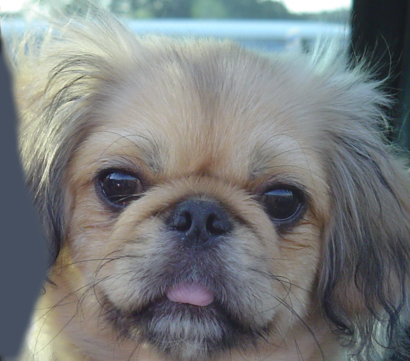

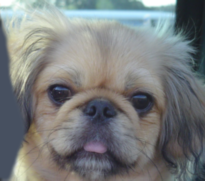

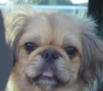

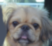

Imágenes de la pirámide gaussiana:


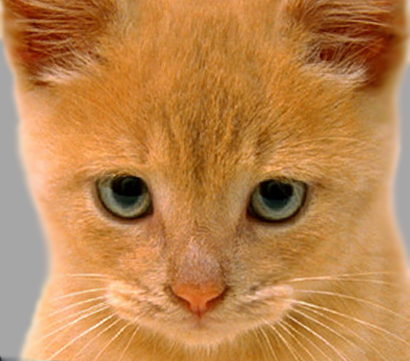

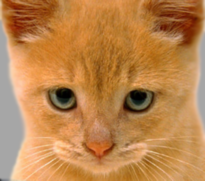

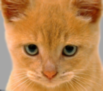

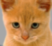

Imágenes de la pirámide laplaciana:


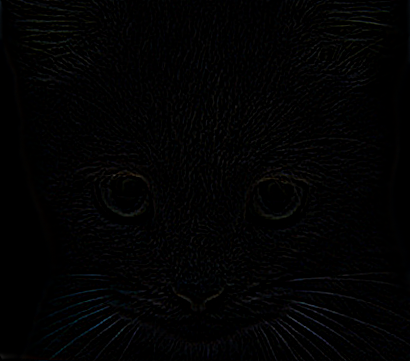

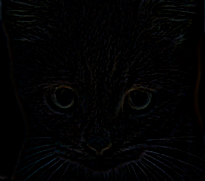

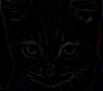

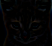

Imágenes de cada paso de la reconstrucción:


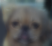

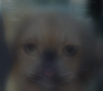

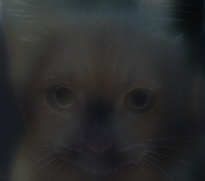

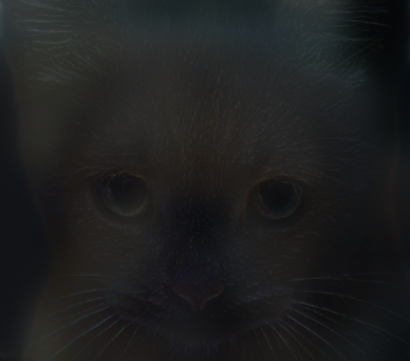

Imagen híbrida final


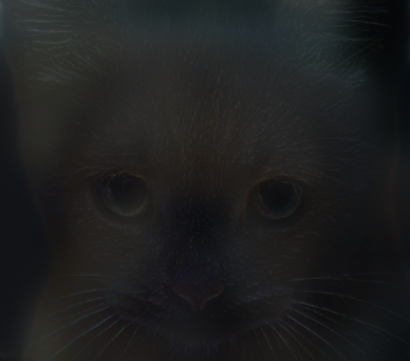

In [17]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow


alpha = 0.7
beta = 0.3


def hybrid_image(image1, image2, levels=5, alpha=0.5, beta=0.5):
    """
    Genera una imagen hibrida a partir de dos imagenes dadas.

    Parameters
    ----------
    image1 : numpy.ndarray
        La primera imagen para la creacion de la imagen hibrida.
    image2 : numpy.ndarray
        La segunda imagen para la creacion de la imagen hibrida.
    levels : int, optional
        El numero de niveles de la piramide Gaussiana utilizados para la creacion de la imagen hibrida (predeterminado es 5).
    alpha : float, optional
        El peso aplicado a la primera imagen en la combinacion (predeterminado es 0.5).
    beta : float, optional
        El peso aplicado a la segunda imagen en la combinacion (predeterminado es 0.5).

    Returns
    -------
    hybrid_image : numpy.ndarray
        La imagen hibrida resultante de la combinacion de las dos imagenes de entrada.

    Example
    -------
    hybrid_image = hybrid_image(image1, image2, levels=4, alpha=0.6, beta=0.4)
    cv2_imshow(hybrid_image)  # Muestra la imagen hibrida resultante
    """
    # Genera piramides Gaussianas para ambas imagenes
    gauss_pyramid1 = generate_gaussian_pyramid(image1, levels)
    gauss_pyramid2 = generate_gaussian_pyramid(image2, levels)

    # Genera piramides Laplacianas para la imagen2
    lap_pyramid2 = generate_laplacian_pyramid(gauss_pyramid2)

    # Reconstruye la imagen hibrida
    hybrid_image = reconstruct(lap_pyramid2, gauss_pyramid1)

    return hybrid_image


def generate_gaussian_pyramid(image, levels):
    """
    Genera una pirámide gaussiana a partir de una imagen.

    Parameters
    ----------
    image : numpy.ndarray
        La imagen de la cual se generará la pirámide gaussiana.
    levels : int
        El número de niveles de la pirámide gaussiana que se generarán.

    Returns
    -------
    pyramid : list
        Una lista de imágenes que representan la pirámide gaussiana, con la imagen original en el primer nivel.

    Example
    -------
    pyramid = generate_gaussian_pyramid(image, 5)
    cv2_imshow(pyramid[0])  # Muestra la imagen original
    cv2_imshow(pyramid[1])  # Muestra el primer nivel de la pirámide
    # ...
    cv2_imshow(pyramid[4])  # Muestra el último nivel de la pirámide
    """

    pyramid = [image]
    print("Imágenes de la pirámide gaussiana:")
    cv2_imshow(image)

    for i in range(levels - 1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
        cv2_imshow(image)

    return pyramid


def generate_laplacian_pyramid(gaussian_pyramid):
    """
    Genera una piramide Laplaciana a partir de una piramide Gaussiana.

    Parameters
    ----------
    gaussian_pyramid : list
        Una lista de imagenes que representan la piramide Gaussiana.

    Returns
    -------
    pyramid : list
        Una lista de imagenes que representan la piramide Laplaciana.

    Example
    -------
    pyramid = generate_laplacian_pyramid(gaussian_pyramid)
    cv2_imshow(pyramid[0])  # Muestra el primer nivel de la piramide Laplaciana
    # ...
    cv2_imshow(pyramid[n-1])  # Muestra el ultimo nivel de la piramide Laplaciana
    """
    pyramid = []
    print("Imágenes de la pirámide laplaciana:")

    for i in range(len(gaussian_pyramid) - 1):
        expanded = cv2.pyrUp(gaussian_pyramid[i + 1])
        expanded = cv2.resize(expanded, (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]))  # Redimensiona para coincidir con las dimensiones
        laplacian = cv2.subtract(gaussian_pyramid[i], expanded)
        pyramid.append(laplacian)

        cv2_imshow(laplacian)

    pyramid.append(gaussian_pyramid[-1])
    cv2_imshow(gaussian_pyramid[-1])

    return pyramid


def reconstruct(lap_pyramid2, gauss_pyramid1):
    """
    Reconstruye la imagen híbrida a partir de la piramide Laplaciana y la piramide Gaussiana.

    Parameters
    ----------
    lap_pyramid2 : list
        Una lista de imagenes que representan la piramide Laplaciana.
    gauss_pyramid1 : list
        Una lista de imagenes que representan la piramide Gaussiana de la primera imagen.

    Returns
    -------
    image : numpy.ndarray
        La imagen reconstruida a partir de las piramides Laplaciana y Gaussiana.

    Example
    -------
    image = reconstruct(lap_pyramid2, gauss_pyramid1)
    cv2_imshow(image)  # Muestra la imagen reconstruida
    """
    # Reconstruye la imagen a partir de la piramide Laplaciana
    image = gauss_pyramid1[-1]
    print("Imágenes de cada paso de la reconstrucción:")
    for i in range(len(lap_pyramid2) - 2, -1, -1):
        expanded = cv2.pyrUp(image)
        expanded = cv2.resize(expanded, (lap_pyramid2[i].shape[1], lap_pyramid2[i].shape[0]))  # Redimensiona para coincidir con las dimensiones
        image = expanded * alpha + lap_pyramid2[i] * beta
        cv2_imshow(image)
    return image


# Load two images
image1 = files.upload()
image2 = files.upload()

image1 = list(image1.keys())[0]
image2 = list(image2.keys())[0]

image1 = cv2.imread(image1)
image2 = cv2.imread(image2)

# Create the hybrid image
hybrid = hybrid_image(image1, image2)

# Display the results
print("Imagen híbrida final")
cv2_imshow(hybrid)


In [ ]:
# Load two images
image1 = files.upload()
image2 = files.upload()

image1 = list(image1.keys())[0]
image2 = list(image2.keys())[0]

image1 = cv2.imread(image1)
image2 = cv2.imread(image2)

Saving perro.png to perro (3).png


Saving gato.png to gato (3).png


Imagen Híbrida Final


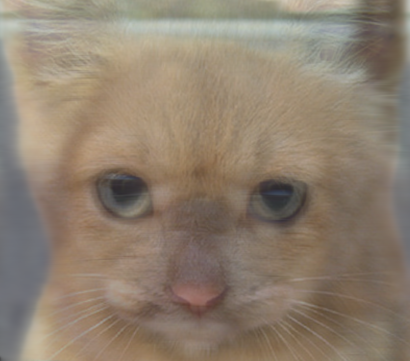

In [ ]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2, fftshift
from google.colab import files
from google.colab.patches import cv2_imshow


def hybrid_image_Fourier(image1, image2, cutoff_frequency, alpha):
    """
    Genera una imagen híbrida a partir de dos imágenes dadas utilizando el filtrado en el dominio de Fourier.

    Parameters
    ----------
    image1 : numpy.ndarray
        La primera imagen para la creación de la imagen híbrida.
    image2 : numpy.ndarray
        La segunda imagen para la creación de la imagen híbrida.
    cutoff_frequency : float
        La frecuencia de corte para el filtro en el dominio de Fourier.
    alpha : float, optional
        El peso aplicado a la primera imagen en la combinación.

    Returns
    -------
    hybrid_image : numpy.ndarray
        La imagen híbrida resultante de la combinación de las dos imágenes de entrada.

    Example
    -------
    hybrid_image = hybrid_image(image1, image2, cutoff_frequency=20, alpha=0.6)
    cv2.imshow("Hybrid Image", hybrid_image)  # Muestra la imagen híbrida resultante
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    """
    # Calcula la Transformada de Fourier de ambas imágenes
    fft_image1 = fft2(image1)
    fft_image2 = fft2(image2)

    # Aplica un filtro en el dominio de Fourier a ambas imágenes
    height, width = image1.shape[:2]
    h, w = height // 2, width // 2
    fft_image1[h-cutoff_frequency:h+cutoff_frequency, w-cutoff_frequency:w+cutoff_frequency] = 0
    fft_image2[:h-cutoff_frequency, :w-cutoff_frequency] = 0
    fft_image2[:h-cutoff_frequency, w+cutoff_frequency:] = 0
    fft_image2[h+cutoff_frequency:, :w-cutoff_frequency] = 0
    fft_image2[h+cutoff_frequency:, w+cutoff_frequency:] = 0

    # Calcula la Transformada Inversa de Fourier de ambas imágenes filtradas
    filtered_image1 = np.abs(ifft2(fft_image1))
    filtered_image2 = np.abs(ifft2(fft_image2))

    # Combina las dos imágenes filtradas
    hybrid_image = alpha * filtered_image1 + (1 - alpha) * filtered_image2

    return hybrid_image


# Create the hybrid image
hybrid = hybrid_image_Fourier(image1, image2, cutoff_frequency= 600, alpha= 0.7)

# Display the results
print("Imagen Híbrida Final")
cv2_imshow(hybrid)